## Experiments

In [1]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt

In [2]:
modalities = ["car", "shared-car", "bike", "public-transport"]

series_reporters = [
    "shared-car-subscriptions",
    "public-transport-subscriptions",
    "count cars",
    *[f"monthly-{m}-trips" for m in modalities],
]

single_reporters = []

In [3]:
replications = 5
exp_nr = 2
exp_names = ["8-sc-default", "32-sc-22-pp-20p-removed", "128-sc-93-pp-40p-removed"]
exp_names = [f"{i}_{name}" for i, name in enumerate(exp_names)]
print(exp_names)

['0_8-sc-default', '1_32-sc-22-pp-20p-removed', '2_128-sc-93-pp-40p-removed']


In [4]:
# Read all the pickles into a dictionary of dataframes
dfs = {}
for name in exp_names:
    dfs[name] = pd.read_pickle(f"../results/experiments/exp_series_{name}_{replications}r_df.pickle")

In [5]:
KPIs = series_reporters

df_end = {}
for KPI in KPIs:
    df_end[KPI] = pd.DataFrame()
    for name, df in dfs.items():
        df_end[KPI][name] = df.iloc[12][KPI]
df_end["count cars"].head(3)

,0_8-sc-default,1_32-sc-22-pp-20p-removed,2_128-sc-93-pp-40p-removed
0,838.0,791.0,674.0
1,827.0,836.0,652.0
2,802.0,782.0,637.0


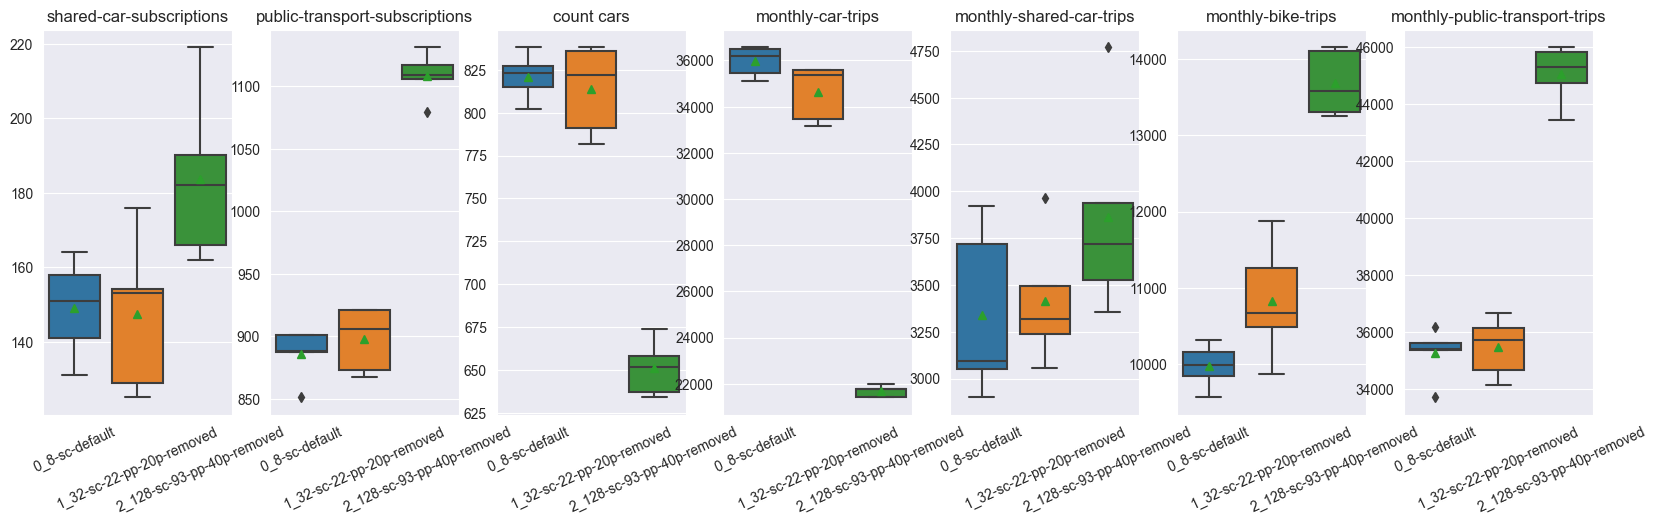

In [6]:
fig, axes = plt.subplots(1,len(KPIs))
fig.set_size_inches(20,5)
g = {}
for i, KPI in enumerate(KPIs):
    g[KPI] = sns.boxplot(df_end[KPI], showmeans=True, ax=axes[i])
    g[KPI].set_xticklabels(g[KPI].get_xticklabels(), rotation=25)
    g[KPI].set_title(KPI)
    # g[KPI].set_ylabel("Residents")
fig.savefig("../images/exp_test_boxplots.svg")

### Dynamics

In [7]:
# Create an empty DataFrame for each KPI
dy_dict = {}
for KPI in KPIs:
    dy_dict[KPI] = pd.DataFrame()

# For each experiment, add a data column to the dataframe of each KPI
for i, exp in enumerate(exp_names):
    df_t = dfs[exp].sort_index(axis="columns", level=0)
    for KPI in KPIs:
        dy_dict[KPI][exp] = df_t[KPI].unstack()
dy_dict[KPIs[0]].head()

0_8-sc-default 1_32-sc-22-pp-20p-removed 2_128-sc-93-pp-40p-removed
0 0.0          144.0                     133.0                      132.0
  1.0          155.0                     161.0                      138.0
  2.0          159.0                     176.0                      145.0
  3.0          161.0                     179.0                      155.0
  4.0          170.0                     181.0                      158.0

In [ ]:
# Plot a lineplot for each KPI with seaborn
# This cell takes a long time, 2 to 3 minutes (probably because of the confidence interval calculation
to_plot = True # Set True to run this complicated plot
if to_plot:
    # Create a figure and axis
    fig, axes = plt.subplots(1,len(KPIs))
    fig.set_size_inches(20,6)

    g = {}
    for i, KPI in enumerate(KPIs):
        # Unstack the dataframe for each KPI, and rename the columns
        df_t = dy_dict[KPI].T.unstack().reset_index()
        df_t.columns = ["Reps", "Ticks", "Experiment", "Data"]

        # Create the lineplot with confidence intervals and save as SVG
        g[KPI] = sns.lineplot(df_t, x="Ticks", y="Data", hue="Experiment", errorbar=("ci", 95), ax=axes[i])
        g[KPI].set_title(f"{KPI}")
        g[KPI].set_xlabel("Months (ticks)")
    fig.suptitle("The experiment results for each KPI (mean with 95% confidence interval)")
    fig.savefig("../images/exp_test_lineplots.svg")

### Streets spotted

In [ ]:
KPI = "shared-car-subscriptions"
df_spotted = pd.DataFrame()

# For each experiment, add a data column to the dataframe of each KPI
for i, exp in enumerate(exp_names):
    df_t = dfs[exp].sort_index(axis="columns", level=0)
    df_spotted[exp] = df_t[KPI].unstack()
df_spotted.head()

In [ ]:
fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(8,5)

df_t = df_spotted.T.unstack().reset_index()
df_t.columns = ["Reps", "Ticks", "Experiment", "Data"]

# Create the lineplot with confidence intervals and save as SVG
gs = sns.lineplot(df_t, x="Ticks", y="Data", hue="Experiment", errorbar=("ci", 95), ax=ax1)

gs.set_title(f"Fraction of streets spotted (mean with 95% confidence interval)")
gs.set_ylabel("Fraction of streets spotted")
gs.set_xlabel("Minutes (ticks)")
fig.savefig("../images/exp_spotted_lineplots.svg")